[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/monisha_111/nltk_data...


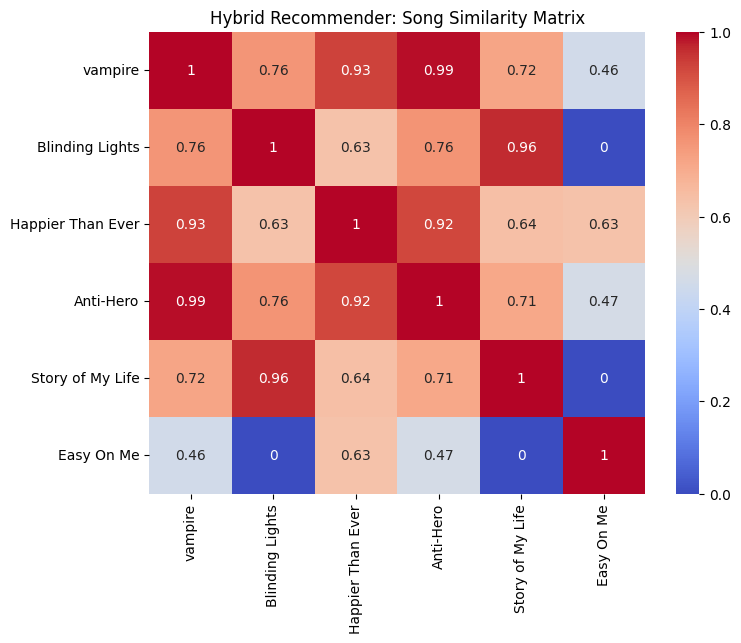

Because you liked 'Anti-Hero', you might also enjoy:
→ vampire by Olivia R.
→ Happier Than Ever by Billie E.


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# 1. Create your dataset
data = {
    "Artist": ["Olivia R.", "The Weeknd", "Billie E.", "Taylor S.", "One D.", "Adele"],
    "Title": ["vampire", "Blinding Lights", "Happier Than Ever", "Anti-Hero", "Story of My Life", "Easy On Me"],
    "Danceability": [0.62, 0.73, 0.55, 0.67, 0.60, 0.48],
    "Energy": [0.75, 0.80, 0.60, 0.70, 0.65, 0.45],
    "Tempo": [198, 200, 176, 185, 190, 75],
    "Rock": [0, 1, 0, 0, 1, 0],
    "Indie": [1, 0, 1, 1, 0, 1],
    "Pop": [1, 1, 1, 1, 1, 0]
}
df = pd.DataFrame(data)

# 2. Normalize numerical features
scaler = MinMaxScaler()
numerical_features = ["Danceability", "Energy", "Tempo"]
df_scaled = df.copy()
df_scaled[numerical_features] = scaler.fit_transform(df[numerical_features])

# 3. NLP sentiment analysis on titles
nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()
df_scaled["Sentiment"] = df["Title"].apply(lambda x: sia.polarity_scores(x)["compound"])

# 4. Combine all features for hybrid filtering
features = ["Danceability", "Energy", "Tempo", "Rock", "Indie", "Pop", "Sentiment"]
song_vectors = df_scaled[features].values

# 5. Compute cosine similarity
similarity_matrix = cosine_similarity(song_vectors)

# 6. Visualize similarity matrix
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, xticklabels=df["Title"], yticklabels=df["Title"], annot=True, cmap="coolwarm")
plt.title("Hybrid Recommender: Song Similarity Matrix")
plt.show()

# 7. Recommend top 2 songs for a sample user who liked “Anti-Hero”
user_liked_idx = df[df["Title"] == "Anti-Hero"].index[0]
similarities = similarity_matrix[user_liked_idx]
top_indices = np.argsort(similarities)[::-1][1:3]  # exclude itself

print(f"Because you liked 'Anti-Hero', you might also enjoy:")
for idx in top_indices:
    print(f"→ {df.iloc[idx]['Title']} by {df.iloc[idx]['Artist']}")
